# DecisionTree

References

    [1] https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69

    [2] https://towardsdatascience.com/decision-tree-classification-de64fc4d5aac

    [3] https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### Load libraries

In [1]:
import pandas as pd

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

### Load dataset


In [2]:
from sklearn.datasets import load_iris #, load_breast_cancer

iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X = pd.DataFrame(data=iris.data,
                 columns=iris.feature_names)

y = pd.DataFrame(data=iris.target, columns=['CLASS'])

In [6]:
X.shape, y.shape

((150, 4), (150, 1))

### Splitting Data

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [7]:
# 70% training and 30% test
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
print('Original: ', X.shape, y.shape,
      '\nTrain:    ',  X_train.shape, y_train.shape,
      '\nTest:      ', X_test.shape, y_test.shape
)

Original:  (150, 4) (150, 1) 
Train:     (105, 4) (105, 1) 
Test:       (45, 4) (45, 1)


### Building Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

In [10]:
# Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.



In [12]:
print("Accuracy:",metrics.accuracy_score(y_train, clf.predict(X_train)))

Accuracy: 1.0


In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, clf.predict(X_test)))

Accuracy: 0.9555555555555556


### Manual Test

In [14]:
X_single = [[6.6, 3.0, 4.4, 1.4]]
clf.predict(X_single)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Finding wrong predictions

In [15]:
err = (y_pred != y_test['CLASS'])

print('Predicted:\n', y_pred[err], '\n\n',
      'Real:\n', y_test[err])

Predicted:
 [2 1] 

 Real:
      CLASS
70       1
133      2


---

### Visualizing Decision Trees

You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook.

***
For plotting tree, you also may need to install graphviz and pydotplus.

`pip install graphviz`

`pip install pydotplus`

***

export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

In [16]:
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO
from six import StringIO

from IPython.display import Image
import pydotplus

In [17]:
import numpy as np
1/8 * (-np.log2(1/8))

0.375

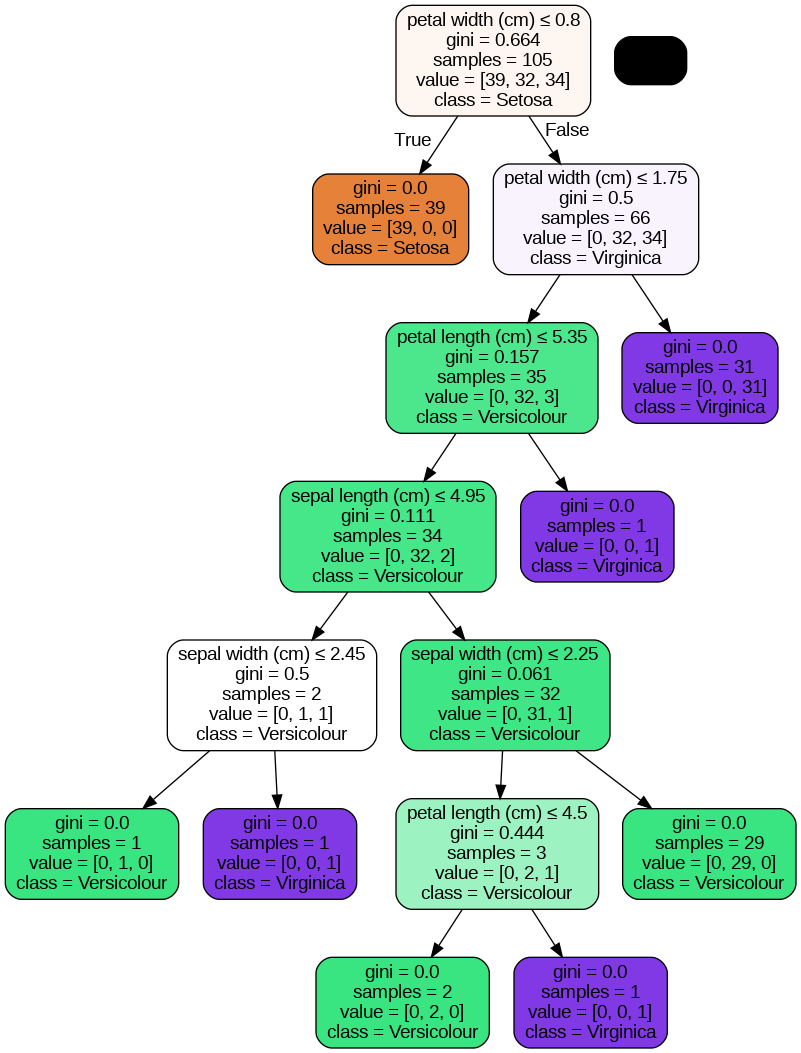

In [18]:
target_names  = ['Setosa', 'Versicolour', 'Virginica']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names   = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('iris.png')
Image(graph.create_png())

In the decision tree chart, each internal node has a decision rule that splits the data. **Gini** referred as ***Gini ratio***, which measures the *impurity* of the node. You can say a **node is pure when all of its records belong to the same class**, such nodes known as the leaf node.

Here, the resultant tree is unpruned. This unpruned tree is unexplainable and not easy to understand. In the next section, let's optimize it by pruning.

### Optimizing Decision Tree Performance

**criterion** : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

**splitter** : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The *higher value* of maximum depth causes *overfitting*, and a *lower value* causes *underfitting* ([Source](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Train Decision Tree Classifer
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


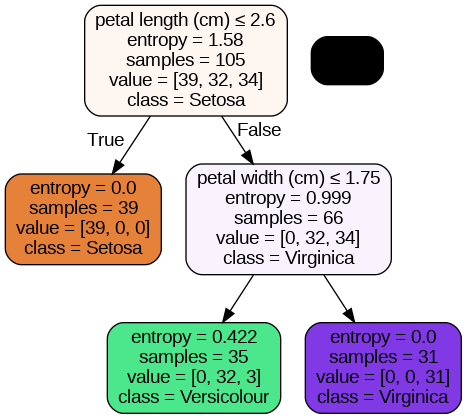

In [20]:
target_names  = ['Setosa', 'Versicolour', 'Virginica']

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names   = target_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#graph.write_png('iris.png')
Image(graph.create_png())

This pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot.

---

### Pros

Decision trees are easy to interpret and visualize.
It can easily capture Non-linear patterns.
It requires fewer data preprocessing from the user, for example, there is **no need to normalize columns**.
It can be used for feature engineering such as predicting missing values, suitable for variable selection.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm. (Source)

### Cons

Sensitive to noisy data. It can overfit noisy data.
The small variation(or variance) in data can result in the different decision tree. This can be reduced by **bagging and boosting** algorithms.
Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.

### Conclusion

Congratulations, you have made it to the end of this tutorial!

In this tutorial, you covered a lot of details about Decision Tree; It's working, attribute selection measures such as Information Gain, Gain Ratio, and Gini Index, decision tree model building, visualization and evaluation on dataset using Python Scikit-learn package. Also, discussed its pros, cons, and optimizing Decision Tree performance using parameter tuning.

Hopefully, you can now utilize the Decision tree algorithm to analyze your own datasets.

## Exercícios:


1.   Utilizando o Dataset *Breast_Cancer*, crie um classificador Decision Tree.
1.   Avalie a acurácia do modelo para os parâmetros default.
1.   Plote o classificador Decision Tree gerado. Você acha que a árvore está muito grande?
1.   Agora faça o "prune" da Decision Tree para usar critério `Entropy` e profundidade máxima `3`. Treine o classificador novamente e Compare o resultado atual com o anterior. Plote a nova árvore gerada.
1.   Agora crie outro classificador (KNN) e compare as métricas (acurácia, Recall, Precision, F1) dos resultados com o classificador de árvore de decisão. Plote o boxplot dos dois algoritmos para as métricas.



In [21]:
#Importando todas as bibliotecas e funções que serão utilizadas durante os exercícios
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np


In [22]:
# 1 - Criando uma Decision Tree com o dataset de Breast Cancer
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

#criando um classificador com estado definido e com demais parâmetros default
classificador_dt = DecisionTreeClassifier(random_state=25)
classificador_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=25)

In [23]:
# 2 - Avalie a acurácia do modelo para os parâmetros default.
acuracia_dt = accuracy_score(y_test, classificador_dt.predict(X_test))
print("Acurácia do Modelo DT:", acuracia_dt)


Acurácia do Modelo DT: 0.9005847953216374


Vemos que o modelo tem uma acurácia aceitável, mas não é ótima. Pode ser que tenha sofrido Overfit e os dados estão muito ajustados aos dados de teste.

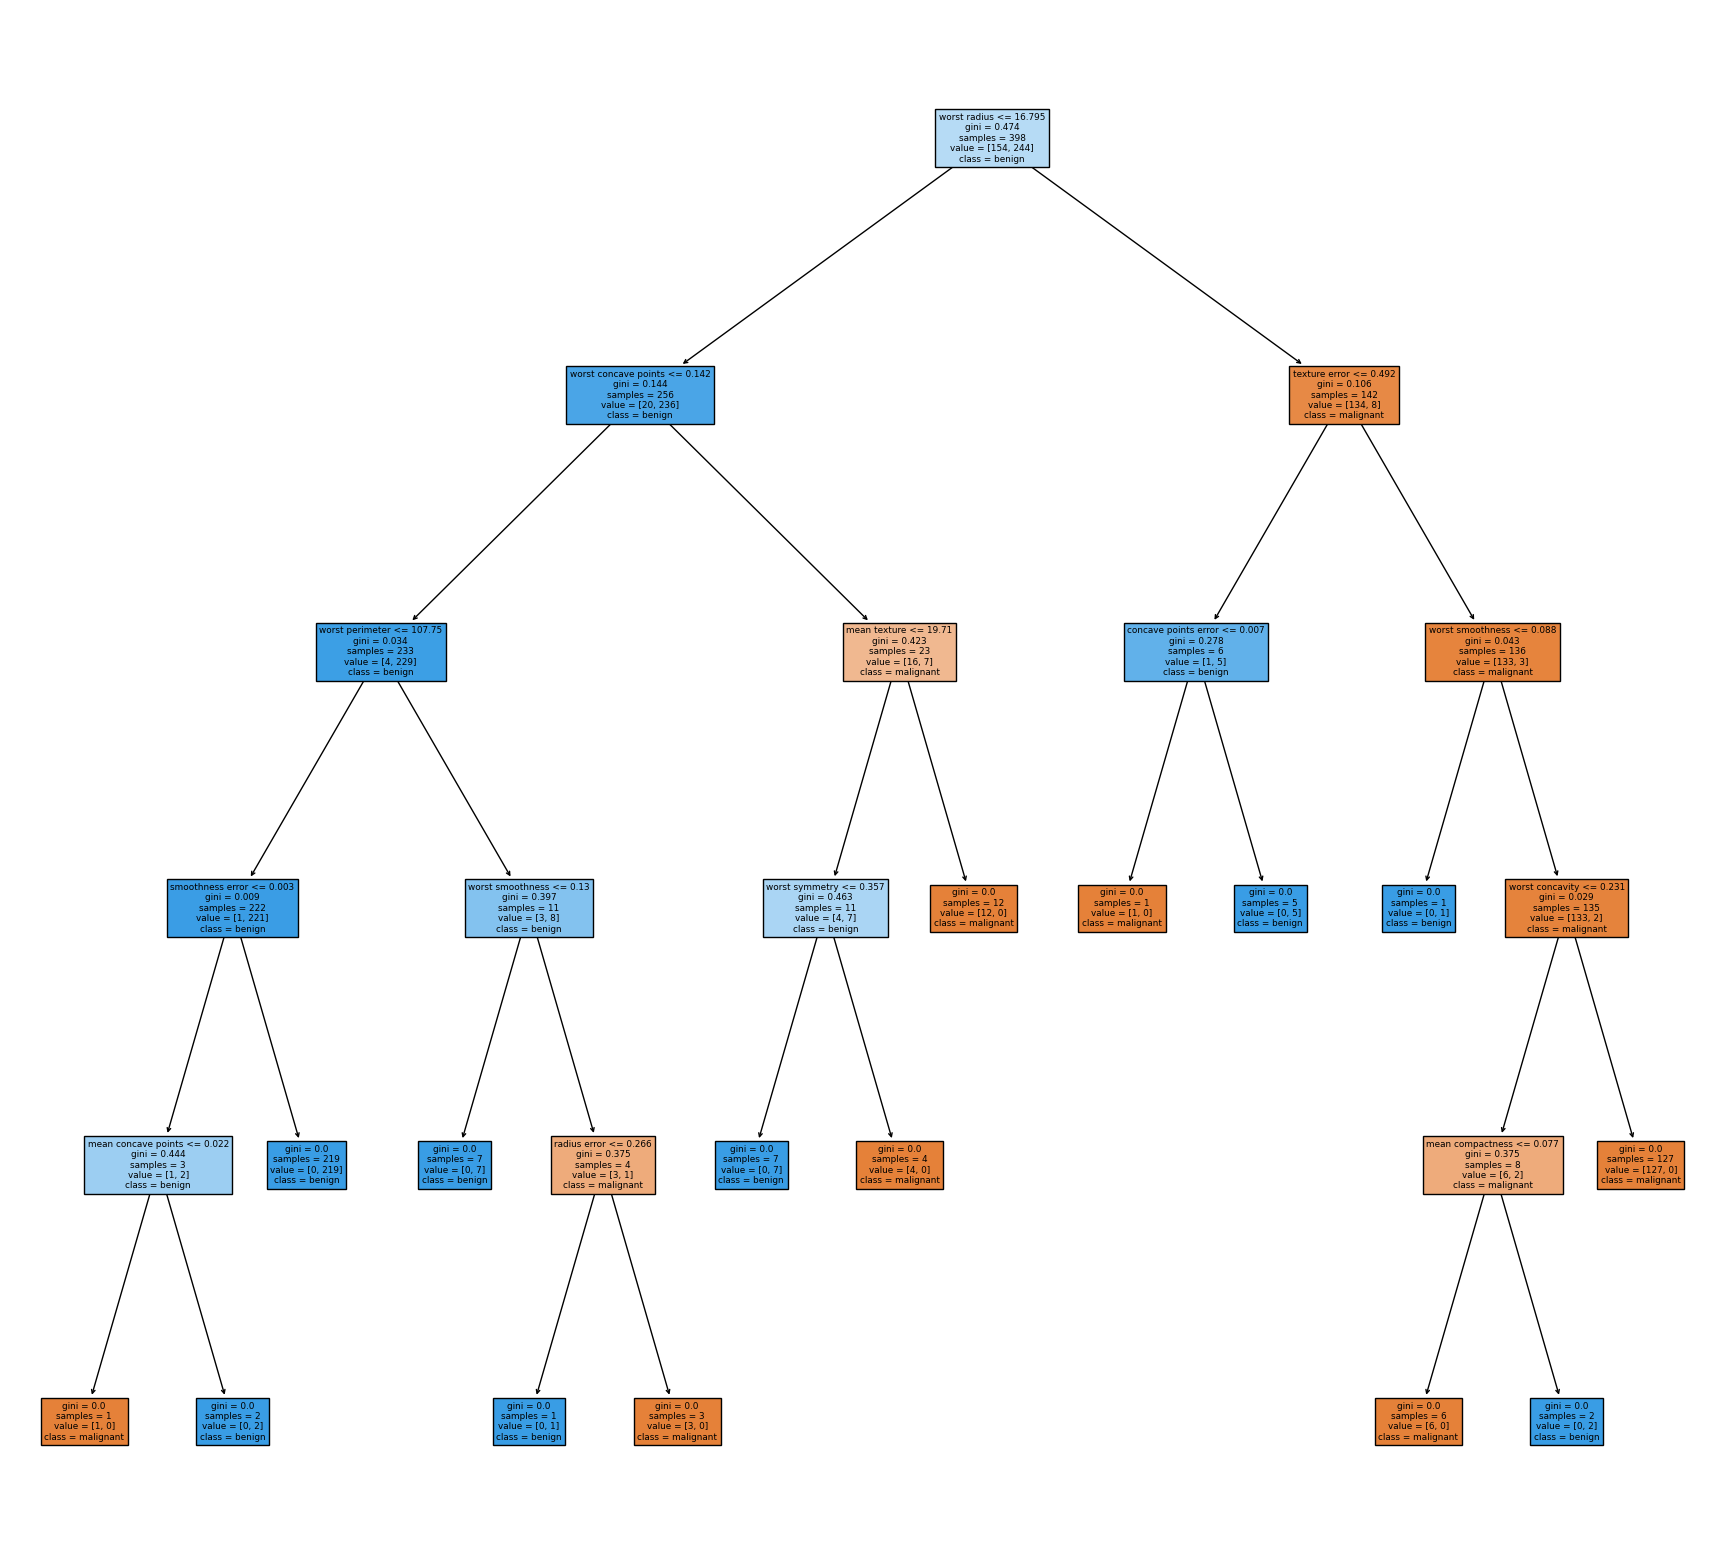

In [24]:
# 3 - Plote o classificador Decision Tree gerado. Você acha que a árvore está muito grande?
plt.figure(figsize=(22, 20))
plot_tree(classificador_dt, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


Vemos que a árvore ficou muito grande, com 5 ou mais níveis até chegar a uma folha. Isso deixa o modelo muito específico e sem muito poder de generalização.

Acurácia DT com poda: 0.9298245614035088
Acurácia DT sem poda: 0.9005847953216374


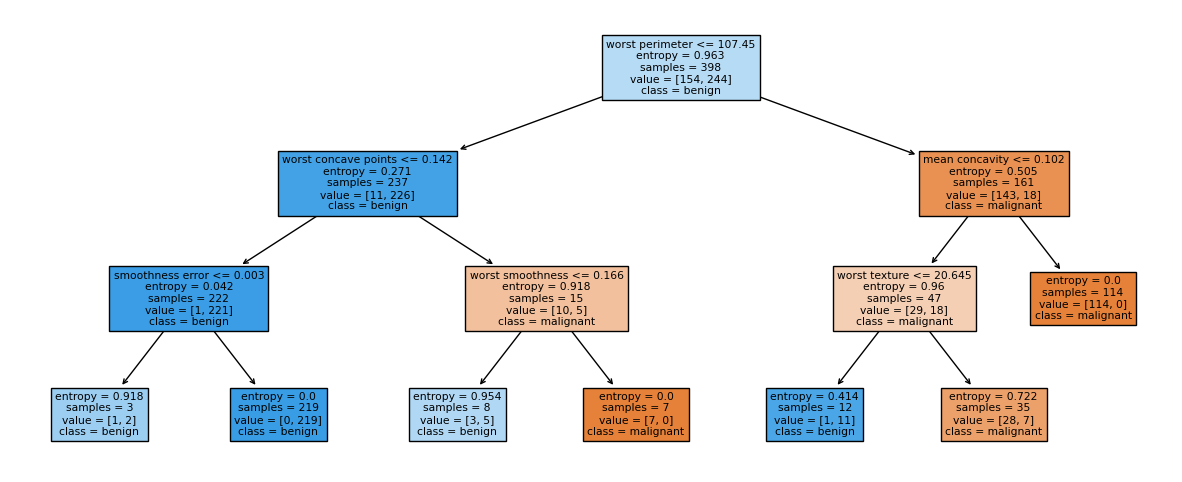

In [25]:
# 4 - Agora faça o "prune" da Decision Tree para usar critério Entropy e profundidade máxima 3. Treine o classificador novamente e Compare o resultado atual com o anterior. Plote a nova árvore gerada.
classificador_dt_poda = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=25)
classificador_dt_poda.fit(X_train, y_train)

acuracia_dt_podado = accuracy_score(y_test, classificador_dt_poda.predict(X_test))
print("Acurácia DT com poda:", acuracia_dt_podado)
print("Acurácia DT sem poda:", acuracia_dt)

plt.figure(figsize=(15, 6))
plot_tree(classificador_dt_poda, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


Vamos que nesse caso apesar de ter podado o modelo, a acurácia melhorou. Isso significa que o modelo inicial estava muito ajustado aos dados de treinamento, e o modelo podado conseguiu generalizar melhor os dados. Nesse caso em específico houve melhoria, mas o modelo podado pode não mudar muita coisa na acurácia ou diminuir, cabe ao analista decidir a melhor opção a partir dos resultados.

In [26]:
# 5 - Agora crie outro classificador (KNN) e compare as métricas (acurácia, Recall, Precision, F1) dos resultados com o classificador de árvore de decisão. Plote o boxplot dos dois algoritmos para as métricas.
# Neste bloco vamos executar cada algoritmo classificador 30 vezes para assim conseguir comparar os resultados e plotar os boxplots com as métricas

# array metricas knn
acuracias_knn = []
knn_recalls = []
knn_precisions = []
knn_f1_scores = []

# array metricas dt
acuracias_dt = []
dt_recalls = []
dt_precisions = []
dt_f1_scores = []

for _ in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

    classificador_knn = KNeighborsClassifier()
    classificador_knn.fit(X_train, y_train)

    knn_y_pred = classificador_knn.predict(X_test)
    acuracias_knn.append(accuracy_score(y_test, knn_y_pred))
    knn_report = classification_report(y_test, knn_y_pred, target_names=data.target_names, output_dict=True)
    knn_recalls.append(knn_report['weighted avg']['recall'])
    knn_precisions.append(knn_report['weighted avg']['precision'])
    knn_f1_scores.append(knn_report['weighted avg']['f1-score'])


    classificador_dt = DecisionTreeClassifier()
    classificador_dt.fit(X_train, y_train)

    dt_y_pred = classificador_dt.predict(X_test)
    acuracias_dt.append(accuracy_score(y_test, dt_y_pred))
    dt_report = classification_report(y_test, dt_y_pred, target_names=data.target_names, output_dict=True)
    dt_recalls.append(dt_report['weighted avg']['recall'])
    dt_precisions.append(dt_report['weighted avg']['precision'])
    dt_f1_scores.append(dt_report['weighted avg']['f1-score'])

# agrupar as métricar em dataframes
metricas_knn_df = pd.DataFrame({
    'Acurácia': acuracias_knn,
    'Recall': knn_recalls,
    'Precision': knn_precisions,
    'F1-Score': knn_f1_scores
})

metricas_dt_df = pd.DataFrame({
    'Acurácia': acuracias_dt,
    'Recall': dt_recalls,
    'Precision': dt_precisions,
    'F1-Score': dt_f1_scores
})



In [27]:
# Descrição das métricas do KNN
metricas_knn_df.describe()

,Acurácia,Recall,Precision,F1-Score
count,30.000000,30.000000,30.000000,30.000000
mean,0.927485,0.927485,0.928805,0.927114
std,0.013788,0.013788,0.013811,0.013963
min,0.894737,0.894737,0.895643,0.894045
25%,0.923977,0.923977,0.923640,0.923052
50%,0.929825,0.929825,0.929718,0.928737
75%,0.934211,0.934211,0.935498,0.933984
max,0.953216,0.953216,0.953216,0.953216


In [28]:
# Descrição das métricas do DT
metricas_dt_df.describe()

,Acurácia,Recall,Precision,F1-Score
count,30.000000,30.000000,30.000000,30.000000
mean,0.923392,0.923392,0.925269,0.923602
std,0.020044,0.020044,0.018716,0.019724
min,0.877193,0.877193,0.885678,0.878883
25%,0.913743,0.913743,0.915086,0.913972
50%,0.926901,0.926901,0.929167,0.927177
75%,0.935673,0.935673,0.938084,0.936097
max,0.959064,0.959064,0.958976,0.958984


Através das descrições dos algoritmos vemos que a média do KNN é um pouco maior que a do DT. O desvio padrão do KNN foi relativamente menor. E o valor máximo foi próximo para ambos.

Podemos concluir que mesmo obtendo resultados semelhantes, o KNN tem menos variabilidade no modelo, onde as execuções diferentes sem concentram em uma mesma região. Já o DT depende muito da qualidade dos dados escolhidos para treinamento.

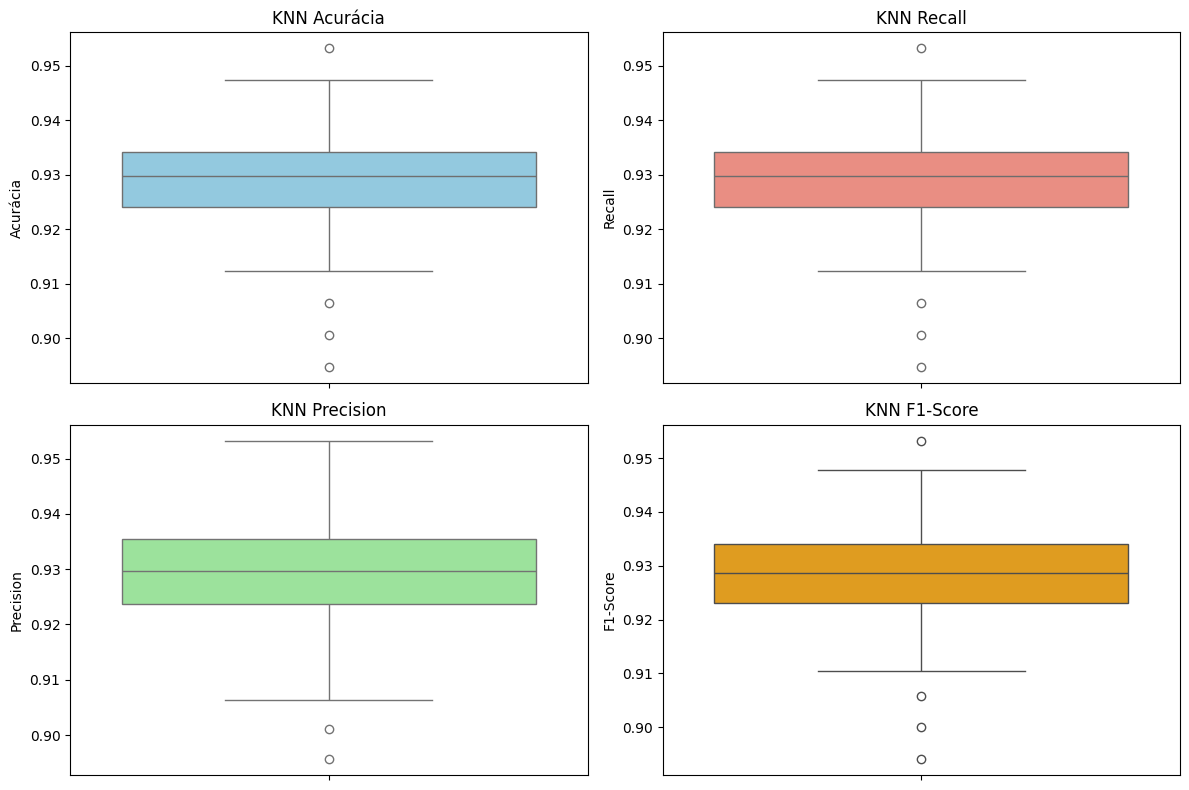

In [29]:
# Boxplot separado para KNN
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=metricas_knn_df['Acurácia'], color='skyblue')
plt.title('KNN Acurácia')

plt.subplot(2, 2, 2)
sns.boxplot(data=metricas_knn_df['Recall'], color='salmon')
plt.title('KNN Recall')

plt.subplot(2, 2, 3)
sns.boxplot(data=metricas_knn_df['Precision'], color='lightgreen')
plt.title('KNN Precision')

plt.subplot(2, 2, 4)
sns.boxplot(data=metricas_knn_df['F1-Score'], color='orange')
plt.title('KNN F1-Score')

plt.tight_layout()
plt.show()


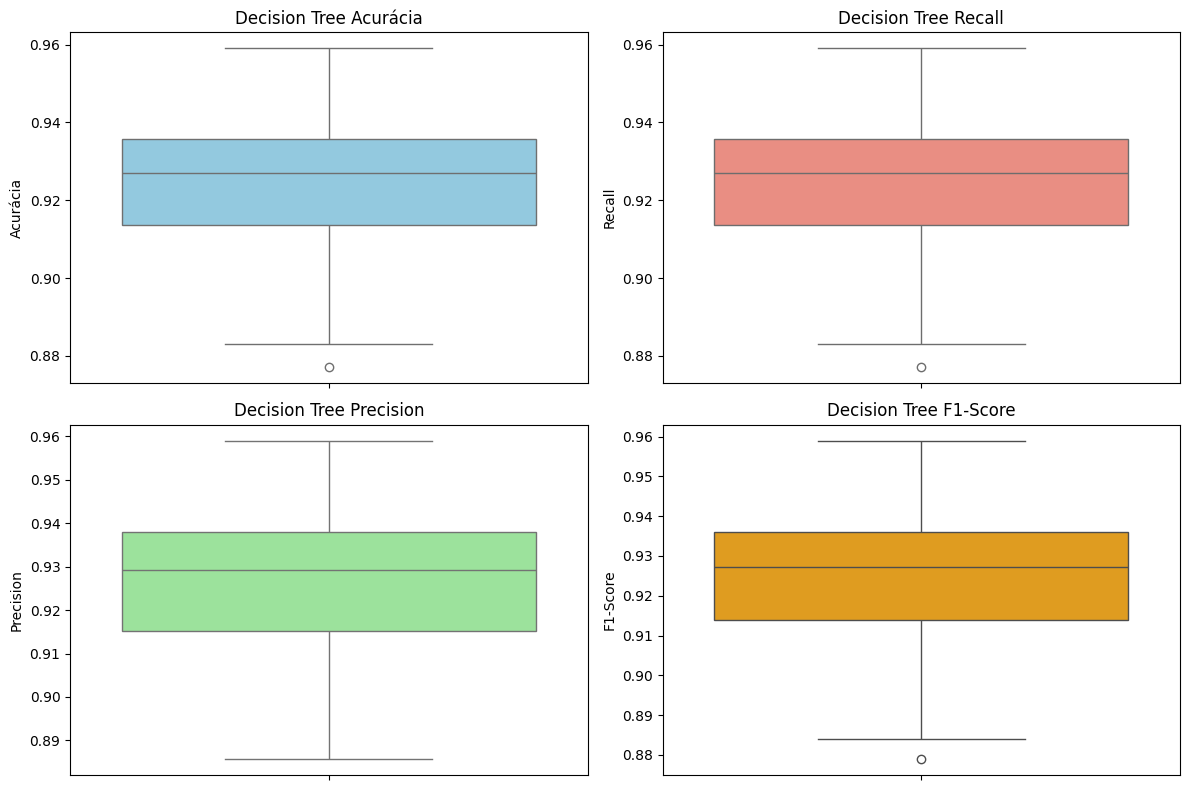

In [30]:
# Boxplot separado para DT
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=metricas_dt_df['Acurácia'], color='skyblue')
plt.title('Decision Tree Acurácia')

plt.subplot(2, 2, 2)
sns.boxplot(data=metricas_dt_df['Recall'], color='salmon')
plt.title('Decision Tree Recall')

plt.subplot(2, 2, 3)
sns.boxplot(data=metricas_dt_df['Precision'], color='lightgreen')
plt.title('Decision Tree Precision')

plt.subplot(2, 2, 4)
sns.boxplot(data=metricas_dt_df['F1-Score'], color='orange')
plt.title('Decision Tree F1-Score')

plt.tight_layout()
plt.show()

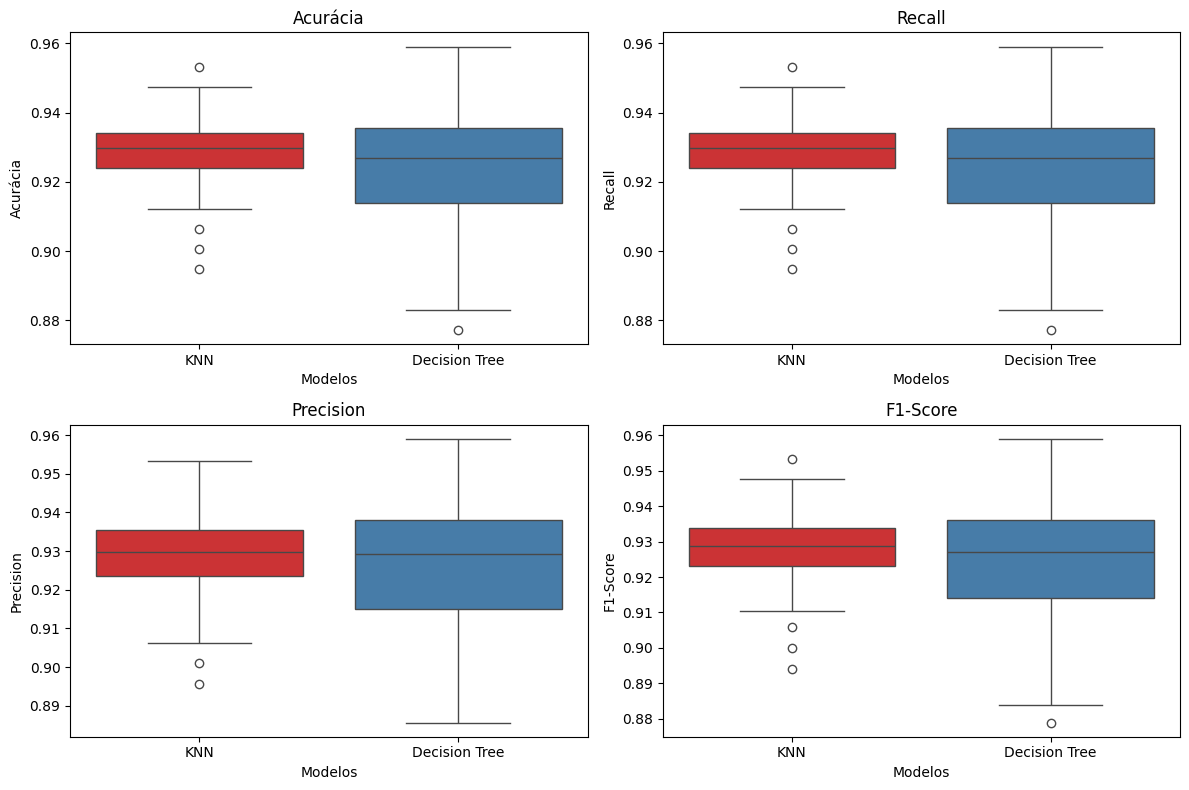

In [31]:
# Aqui vamos concatenar as métricas no mesmo dataframe para plotar as métricas de cada um lado a lado
combined_metrics_df = pd.concat([metricas_knn_df, metricas_dt_df], keys=['KNN', 'Decision Tree'], names=['Modelos']).reset_index()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=combined_metrics_df, x='Modelos', y='Acurácia', hue='Modelos', legend=False, palette="Set1")
plt.title('Acurácia')

plt.subplot(2, 2, 2)
sns.boxplot(data=combined_metrics_df, x='Modelos', y='Recall', hue='Modelos', legend=False, palette="Set1")
plt.title('Recall')

plt.subplot(2, 2, 3)
sns.boxplot(data=combined_metrics_df, x='Modelos', y='Precision', hue='Modelos', legend=False, palette="Set1")
plt.title('Precision')

plt.subplot(2, 2, 4)
sns.boxplot(data=combined_metrics_df, x='Modelos', y='F1-Score', hue='Modelos', legend=False, palette="Set1")
plt.title('F1-Score')

plt.tight_layout()
plt.show()
